In [10]:
#Importing libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [11]:
#Reading the data 
data=pd.read_csv('customer_booking.csv',encoding='latin-1')

In [12]:
#Learning about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [13]:
#Viewing the data rows
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [14]:
#Getting the inferential statistics for continuos variables
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [15]:
#Getting the inferential statistics for categorical variables
data.describe(include=object)

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [16]:
#replacing the not set values in country column by mode of the column
z=data['booking_origin'].mode()[0]
data['booking_origin']=data['booking_origin'].apply(lambda x : z if x=='(not set)' else x) 

Text(0.5, 1.0, 'boxplot for number of passenger')

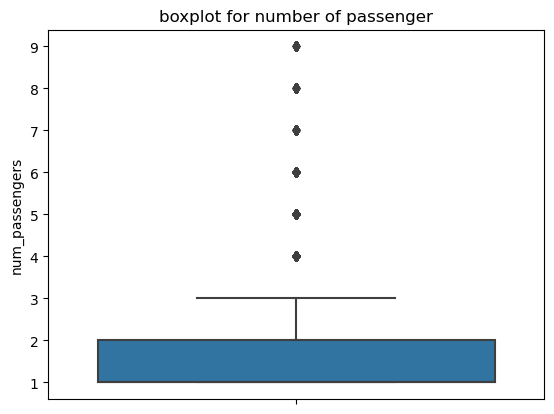

In [17]:
#boxplot for num of passengers
sns.boxplot(y=data['num_passengers']).set_title('boxplot for number of passenger')

Text(0.5, 1.0, 'length_of_stay across trip_type')

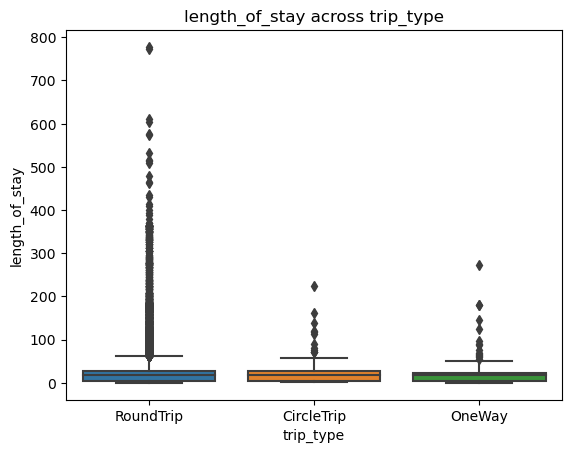

In [18]:
#boxplot for length of stay across trip type
sns.boxplot(x=data['trip_type'],y=data['length_of_stay']).set_title('length_of_stay across trip_type')

Text(0.5, 1.0, 'length_of_stay across sales channel')

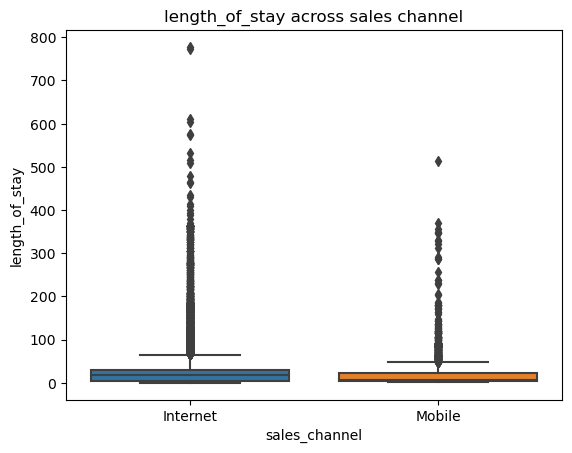

In [19]:
#getting box plot for length of stay across sales channel
sns.boxplot(y=data['length_of_stay'], x=data['sales_channel']).set_title('length_of_stay across sales channel')

Text(0.5, 1.0, 'purchase lead across trip type')

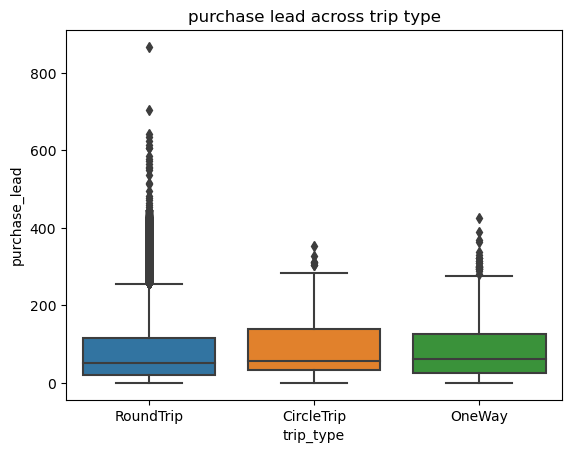

In [20]:
#box plot for purchase lead across trip type 
sns.boxplot(y=data['purchase_lead'], x=data['trip_type']).set_title('purchase lead across trip type')

Text(0.5, 1.0, 'purchase_lead across sales channel')

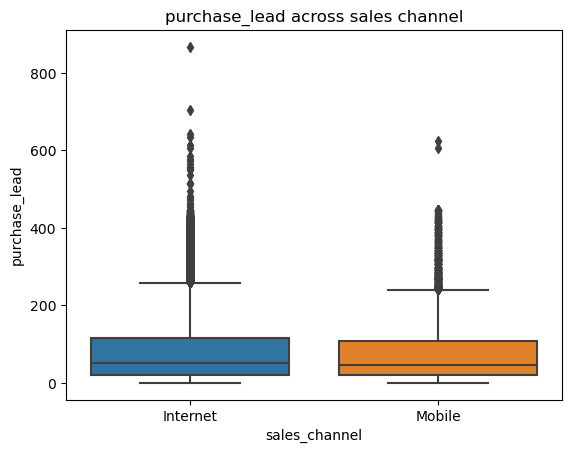

In [21]:
#box plot for purchase lead across sales channel
sns.boxplot(y=data['purchase_lead'], x=data['sales_channel']).set_title('purchase_lead across sales channel')

<Axes: ylabel='flight_duration'>

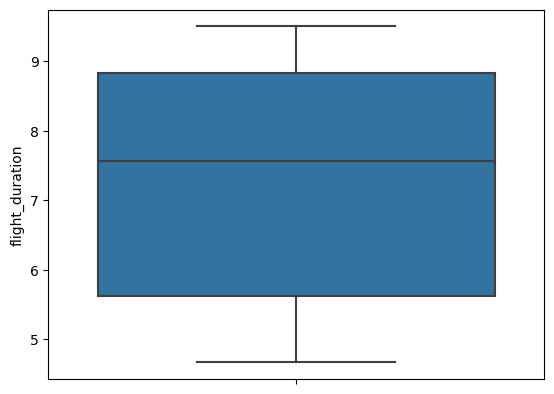

In [22]:
#Box plot on fligt duration
sns.boxplot(y=data['flight_duration'])

Text(0.5, 1.0, 'flight_day, Countplot')

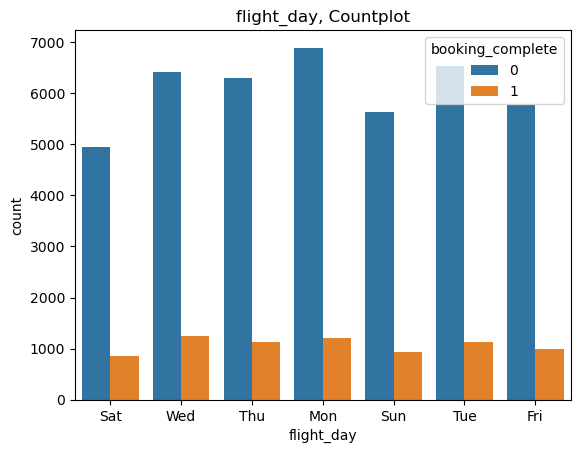

In [23]:
#a countplot on fligh day and the bookings vs the booking complete 
sns.countplot(x=data['flight_day'],data=data,hue=data['booking_complete']).set_title('flight_day, Countplot')

In [24]:
#Top 20 countries by booking =1
data.pivot_table(index='booking_origin',aggfunc=sum, 
                 values='booking_complete').sort_values(by='booking_complete', ascending=False).head(20)

,booking_complete
booking_origin,
Malaysia,2468
Australia,914
China,694
Indonesia,615
Japan,478
Thailand,470
South Korea,462
Singapore,299
Taiwan,224


In [25]:
data['booking_complete'].value_counts().head(20)

0    42522
1     7478
Name: booking_complete, dtype: int64

In [26]:
#Top 20 countries by booking =1
data.pivot_table(index='route',aggfunc=sum, 
                 values='booking_complete').sort_values(by='booking_complete', ascending=False).head(20)

,booking_complete
route,
AKLKUL,567
PENTPE,401
DMKKIX,187
JHBKTM,164
MELPEN,137
ICNPEN,135
KTMPEN,118
CGKHND,105
HNDPEN,98


Text(0.5, 1.0, 'Number of Passengers, Countplot')

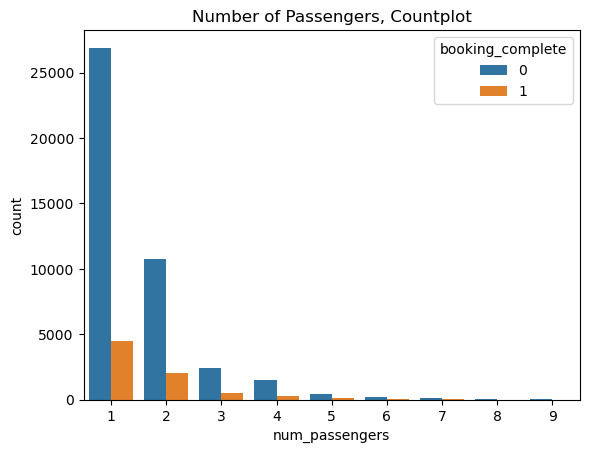

In [27]:
#A countplot on num of passengers and the bookings vs bookings complete 
sns.countplot(x=data['num_passengers'],data=data,hue=data['booking_complete']).set_title('Number of Passengers, Countplot')

Text(0.5, 1.0, 'Flight_hour, Countplot')

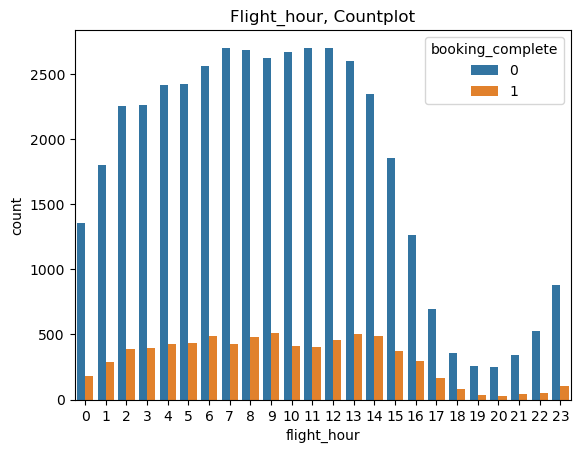

In [28]:
#flight hour countplot with bookings vs bookings completed
sns.figsize=(1,1)
sns.countplot(x=data['flight_hour'],data=data,hue=data['booking_complete']).set_title('Flight_hour, Countplot')

Text(0.5, 1.0, 'Sales channel, Countplot')

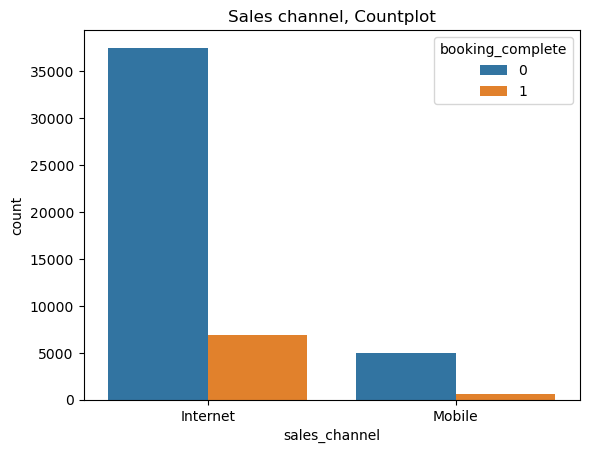

In [29]:
#countplot on sales channel 
sns.countplot(x=data['sales_channel'],data=data,hue=data['booking_complete']).set_title('Sales channel, Countplot')

Text(0.5, 1.0, 'Trip type/Booked')

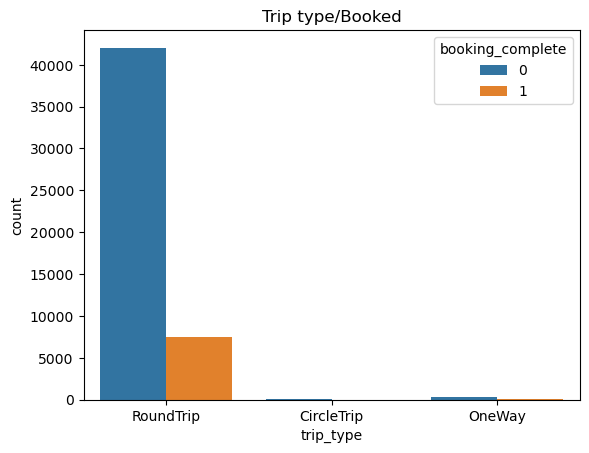

In [30]:
#counplot on triptype
sns.countplot(x=data['trip_type'],data=data,hue=data['booking_complete']).set_title('Trip type/Booked')

Text(0.5, 1.0, 'Baggage, Countplot')

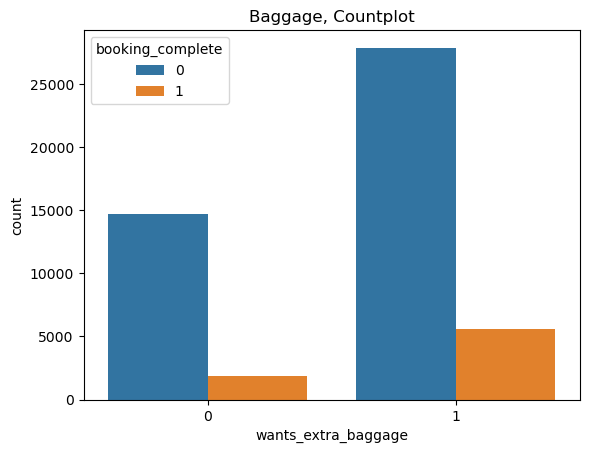

In [31]:
#countplot on extra baggage
sns.countplot(x=data['wants_extra_baggage'],data=data,hue=data['booking_complete']).set_title('Baggage, Countplot')

Text(0.5, 1.0, 'In flight meals, Countplot')

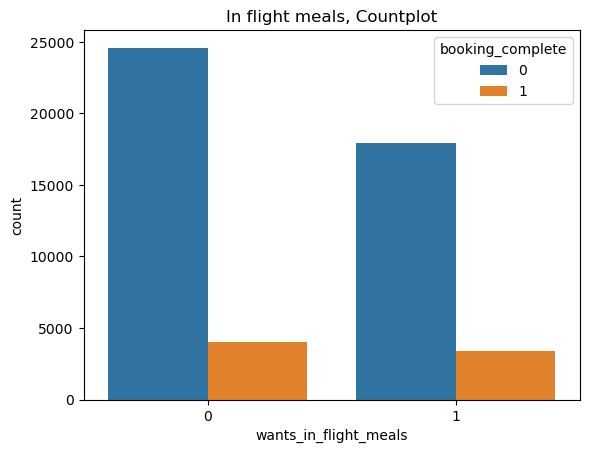

In [32]:
#countplot on extra in flight meals
sns.countplot(x=data['wants_in_flight_meals'],data=data,hue=data['booking_complete']).set_title('In flight meals, Countplot')

Text(0.5, 1.0, 'Preferred Seat, Countplot')

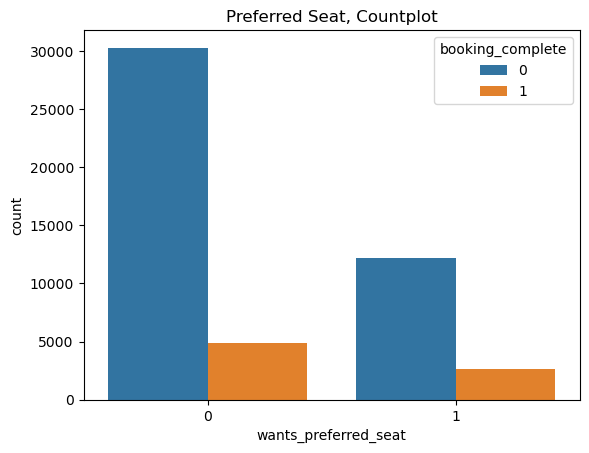

In [33]:
#countplot on extra in preferred seats
sns.countplot(x=data['wants_preferred_seat'],data=data,hue=data['booking_complete']).set_title('Preferred Seat, Countplot')

C:\Users\jubin\AppData\Local\Temp\ipykernel_14328\228167509.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True).set_title('Correlation Matrix')


Text(0.5, 1.0, 'Correlation Matrix')

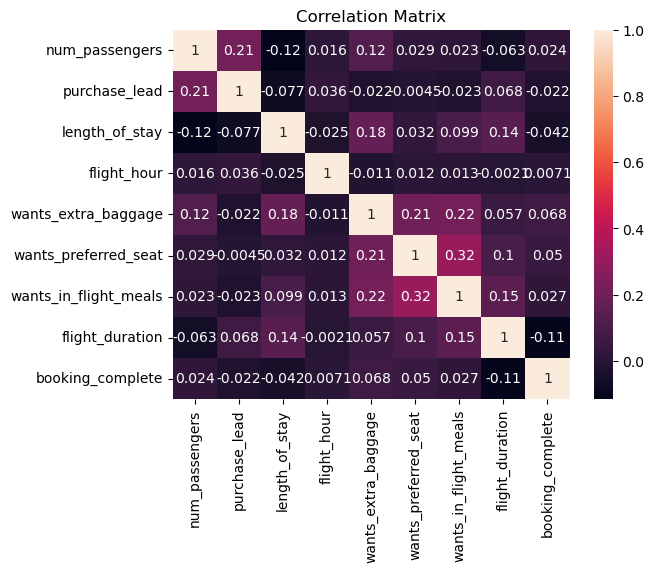

In [34]:
#creating a heatmap to evalue the strength
sns.heatmap(data.corr(), annot=True).set_title('Correlation Matrix')

In [35]:
#seperating the categorical and numerical variables
data_cat=data.select_dtypes(include='object')
data_num=data.select_dtypes(exclude='object')

In [36]:
#OHE on the categorical variables
columns = ['sales_channel', 'trip_type']
for value in columns:
    data_cat=pd.get_dummies(data_cat, columns=[value],drop_first=True)
data_cat=data_cat.drop(['booking_origin', 'route', 'flight_day'],axis=1)

<Axes: xlabel='booking_complete', ylabel='purchase_lead'>

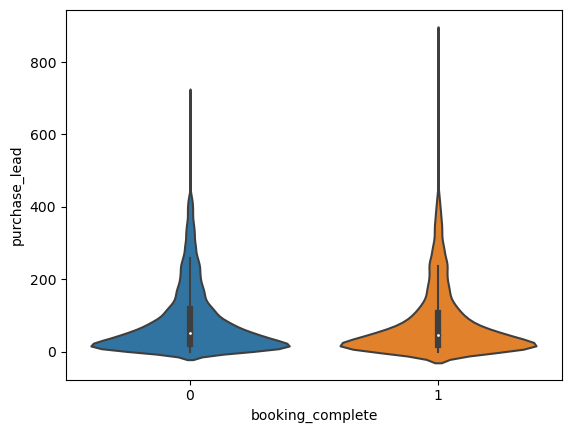

In [37]:
# Since lenght of stay and purchase lead have high number of outliers lets do a study around them
sns.violinplot(x=data['booking_complete'], y=data['purchase_lead'])

<Axes: xlabel='booking_complete', ylabel='length_of_stay'>

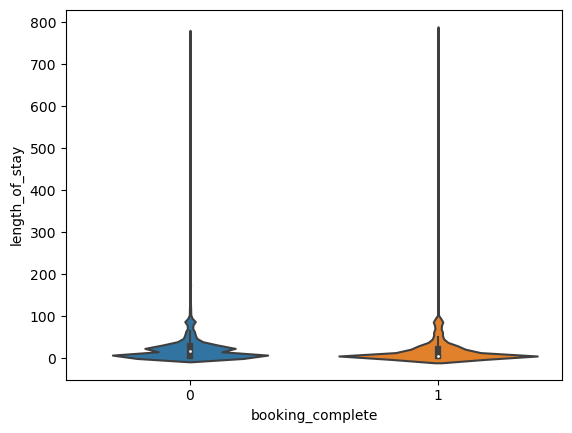

In [38]:
# Since lenght of stay and lenght have high number of outliers lets do a study around them
sns.violinplot(x=data['booking_complete'], y=data['length_of_stay'])

In [39]:
#both the variables are quite skewed and they a lot of outliers as well
#Lets follow replacing the outliers by median values

# Replacing outliers with median
#function to replace ouliers with values outside the upper and lower bound
treat_list=['length_of_stay','purchase_lead', 'num_passengers']
for feature in treat_list:
    Q1= data_num[feature].quantile(0.25)
    Q3 =data_num[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR
  
    median = data_num[feature].median()
    
    data_num[feature] = np.where(data_num[feature]< lower_limit, median,data_num[feature])
    data_num[feature] = np.where(data_num[feature]> upper_limit, median,data_num[feature])

In [40]:
#prepping data for scaling
data_mod=pd.concat([data_cat,data_num], axis=1)

In [41]:
#seperating of values before scaling
X=data_mod.drop(columns=['booking_complete'])
y=data_mod['booking_complete']

In [42]:
# Using StandardScaler 
scaling = StandardScaler()
X_scaled = scaling.fit_transform(X)

In [43]:
#putting it in a dataframe and seeing the data
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.355785,-0.08832,0.100808,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175


In [44]:
#since our data was imbalance we need to create and synthesize more values for booking =1
#or else our results will nnaturally be having fitting issues
# using imblearn to removing imablance in our dataset with respect to booking_complete=1
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaled, y)
print(X_smote.shape)
print(y_smote.shape)

(85044, 11)
(85044,)


In [45]:
#Doing Train test split for model preparation
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote, test_size=.25, random_state=0)

In [48]:
#Building Model on RFC
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
#predicting the values based on the traied model
y_pred=rfc.predict(X_test)

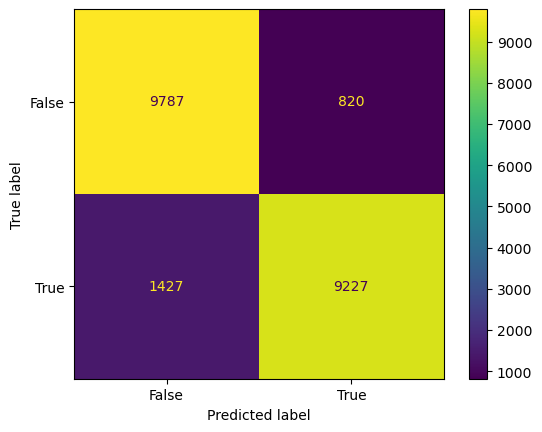

In [50]:
#Creating a confusion matrix to see how our model performed
ConMat=confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = ConMat, display_labels=[False,True])
cm_display.plot()
plt.show()

In [52]:
#Printing the accuracy reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     10607
           1       0.92      0.87      0.89     10654

    accuracy                           0.89     21261
   macro avg       0.90      0.89      0.89     21261
weighted avg       0.90      0.89      0.89     21261



Text(0.5, 1.0, 'Feature Importance')

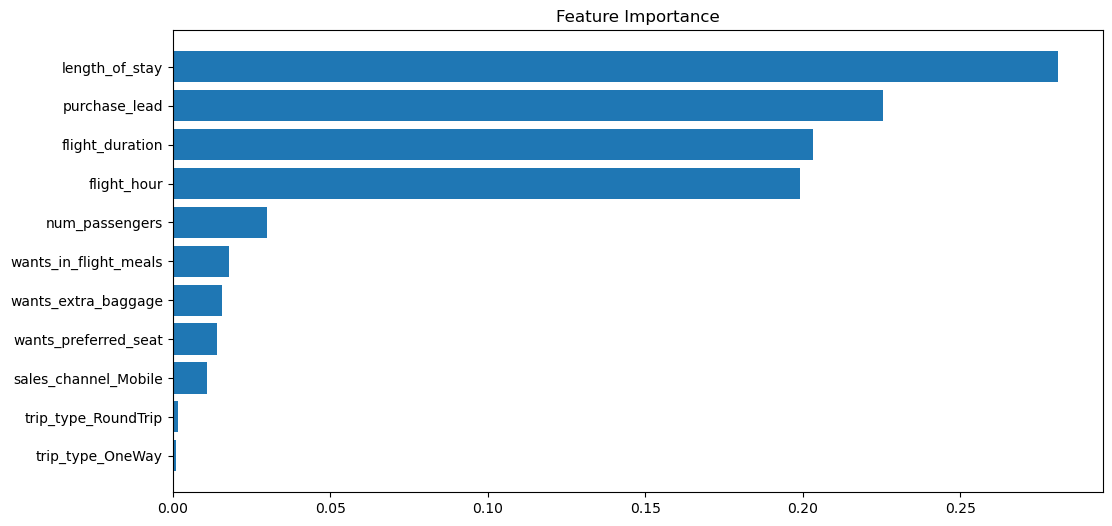

In [276]:
feature_importance = rfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

In [280]:
# Using K-FOLD method by using cross_val_score
accuracy = cross_val_score(rfc, X_train, y_train, cv=10)
accuracy

array([0.87913466, 0.88885405, 0.87756702, 0.88570085, 0.88538727,
       0.88444653, 0.88648479, 0.88037002, 0.8792725 , 0.88742553])

In [288]:
print(np.mean(accuracy))

0.8834643217979032
